## K Medoids Clustering
#### The K is a hyperparameter here, which denotes number of clusters.
#### It's a medoid based clustering scheme.
#### It aims at minimizing the dissimilarities between object in same cluster.

## Steps
#### 1. Initially, assume K points from data and assign them as medoids.
#### 2. For a particular data point, calculate the distance of point with each medoid.
#### 3. Assign the point to cluster having mininum distance.
#### 4. Once, all are assigned, recalculate the medoids.
#### New Medoids = Median of all those points belonging to a particular cluster
#### 5. Repeat until convergence. (This can be adjusted).
#### 6. At the end, we get the final K Medoids depicting K Clusters belonging to the data.

In [6]:
# Imports

import pandas as pd
import numpy as np
import random
import math
import sys
import matplotlib.pyplot as plt
from pprint import pprint
import seaborn as sns
from scipy.spatial import distance
from sklearn.datasets import (make_blobs,make_circles,make_moons)
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.preprocessing import StandardScaler
%matplotlib inline

### Dataset
#### Here we have considered the Old Faithful dataset, which contains details of eruption duration and waiting time in between eruptions of the Old Faithful Geyser.

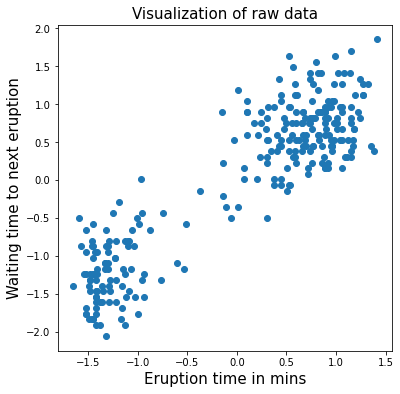

In [100]:
'''
    Reading the dataset and exploiting it's features to get rough idea about the clusters.
    Here we are trying to cluster the samples according to it's features.
    Also, we need to standardize the data before applying K Medoids on it.
'''

# Reading the data
data = pd.read_csv('../Dataset/faithful.csv')
data = data.iloc[:,1:]

# Standardizing the data
data_std = StandardScaler().fit_transform(data)
data_std = pd.DataFrame(data_std)
plt.figure(figsize=(6, 6))
plt.scatter(data_std.iloc[:, 0], data_std.iloc[:, 1])
plt.xlabel('Eruption time in mins', fontsize=15)
plt.ylabel('Waiting time to next eruption', fontsize=15)
plt.title('Visualization of raw data', fontsize=15);

data_std = data_std.to_numpy()

# print(type(data))
# data = data.to_numpy()
# print(data[0])

#### From the following visualization, we can see that there are 2 clusters.
#### The main concern is to seperate the border samples.

### Hence, we define a class with all the functionalities for K Medoids Clustering

In [74]:
# Defining function to get set of empty list of given size
def init_list_of_objects(size):
    list_of_objects = list()
    for i in range(0,size):
        list_of_objects.append( list() ) #different object reference each time
    return list_of_objects

In [94]:
class KMedoidsClustering:
    
    def __init__(self, K):
        self.k = K
        self.medoids = [None]*self.k
        self.datapoints = init_list_of_objects(self.k)
        
    # Initializing the random medoids
    def initializeMedoids(self, new_medoids):
        self.medoids = new_medoids
        
    # Reinitializing the assigned points
    def reinitialize(self):
        self.datapoints = init_list_of_objects(self.k)
    
    # Calculate distance between 2 points
    def calculateDistance(self, a, b):
        dx = (a[0]-b[0])**2
        dy = (a[1]-b[1])**2
        d = dx + dy
        return float(np.sqrt(d))

    # Calculate nearest cluster and add point into that according to minimum distance
    def calculateNearestCluster(self, point):
        min_k = -1
        min_dist = sys.float_info.max
        for i in range(len(self.medoids)):
            temp = self.calculateDistance(self.medoids[i], point)
            if temp < min_dist:
                min_dist = temp
                min_k = i
        
        self.datapoints[min_k].append(point)
        
    # Calculate the new values of medoids according to the assigned data
    def calculateNewMedoids(self):
        new_medoids = []
        for i in range(len(self.medoids)):
            median = np.median(self.datapoints[i], axis = 0)
            new_medoids.append(median)
            
        return new_medoids
    
    def calculateError(self, new_medoids):
        dist = []
        
        for i in range(len(self.medoids)):
            dist.append(self.calculateDistance(self.medoids[i], new_medoids[i]))
            
        error = sum(dist)
        return error

random index: [129, 143]
Initial Random Medoids: [array([1.02014068, 1.40773747]), array([1.16672562, 0.44973907])]
ITERATION: 1
Error:  1.4343087355974333
ITERATION: 2
Error:  1.8600933696336226
ITERATION: 3
Error:  0.6047212223198952
ITERATION: 4
Error:  0.022382730091938363
ITERATION: 5
Error:  0.0
Error is below 10^-5
Converged after 5 iterations


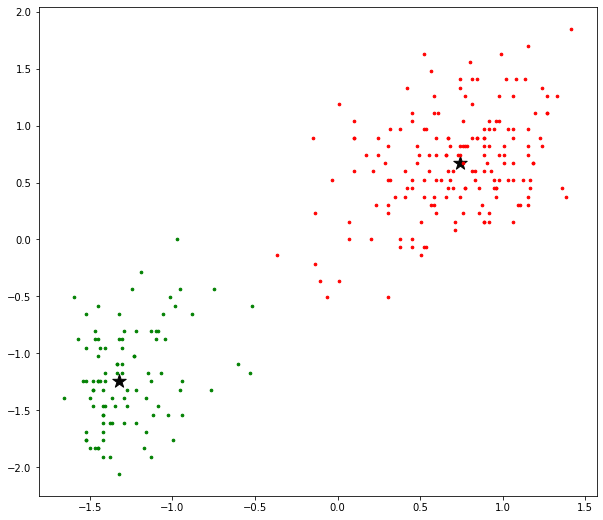

In [98]:
# Defining K
K = 2

# Instantating the class with value of K
clustering = KMedoidsClustering(K)

# Generating K random index to pick
random_index = random.sample(range(0, data_std.shape[0]+1), K)
print("random index:", random_index)

# Obtain the K random data points
random_medoids = []
for i in range(len(random_index)):
    t = data_std[random_index[i]]
    random_medoids.append(t)

# Initializing the class object medoids
print("Initial Random Medoids:", random_medoids)
clustering.initializeMedoids(random_medoids)

# defining maximum iterations
max_iter = 20

# Iterating 10 times (Just assumption, can be any number of times)
for iterations in range(0, max_iter):
    if iterations!=0:
        # Update the medoids
        clustering.medoids = new_medoids.copy()
        
    clustering.reinitialize()
    print("ITERATION:", iterations+1)
    
    # ITerate through each data point
    for i in range(data_std.shape[0]):
        point = data_std[i]
        clustering.calculateNearestCluster(point)
    
    # Calculate the new centroids
    new_medoids = clustering.calculateNewMedoids()
    error = clustering.calculateError(new_medoids)
    print("Error: ", error)
    
    if error < 0.00001:
        print("Error is below 10^-5")
        print("Converged after", iterations+1, "iterations")
        break
        
    if ((iterations+1)==max_iter):
        print("Converged after", max_iter, "iterations")
    

colors = ['r', 'g', 'b', 'k', 'm']
fig, ax = plt.subplots(figsize=(10, 9))

# Iterating through K for plotting the K Clusters
for i in range(K):
    # Plotting the medoids
    ax.scatter(new_medoids[i][0], new_medoids[i][1], marker='*', s=200, c='#050505')
    
    # Plotting each data point belonging to that cluster
    for j in range(len(clustering.datapoints[i])):
        ax.scatter(clustering.datapoints[i][j][0], clustering.datapoints[i][j][1], s=7, c=colors[i])